In [147]:
import pandas as pd 
import numpy as np 
import pylab
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import DBSCAN ,KMeans
from sklearn.metrics.pairwise import euclidean_distances as eud
from scipy.cluster import hierarchy 

In [32]:
dfdb = pd.read_csv('customer.csv')
dfdb

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
xdb = dfdb.values[:,2:]

In [34]:
xdb = StandardScaler().fit_transform(xdb)

In [162]:
db = DBSCAN(eps=0.4,min_samples=3).fit(xdb)
labelsdb=db.labels_
labelsdb

array([-1,  0, -1,  0,  1,  0, -1, -1, -1,  2, -1, -1, -1,  0, -1,  0,  1,
       -1, -1, -1,  1,  0, -1,  2, -1,  2, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  2, -1,  0, -1, -1,  3,  4,  3, -1,  3,  4,  4,  4,  3,
        4,  4,  5,  3,  3,  3,  5,  4,  3,  5,  4,  5,  5,  5,  4,  3,  5,
        4,  4,  5,  3,  5,  5,  5,  4,  3,  3,  4,  3,  5,  3,  5,  3,  4,
        3,  5,  4,  3,  3,  5,  4,  3,  3, -1,  4,  3,  4,  3,  4,  4,  3,
        5,  4,  3,  4,  5,  3,  5,  5,  5,  4,  3,  4,  4,  4,  5,  3,  3,
        3,  4,  3, -1,  6,  8,  6, -1,  6, -1,  6,  7,  6,  8,  6,  9,  6,
        7,  6,  9,  6, -1,  6,  8,  6, -1,  6, -1,  6, -1,  6,  7,  6,  7,
        6,  7,  6, -1,  6, -1,  6, -1,  6,  9,  6, -1,  6,  7,  6, -1, -1,
        7,  6,  7,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,  6, -1,
       -1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [163]:
coresamp = np.zeros_like(labelsdb, dtype=bool)
coresamp[db.core_sample_indices_] = True
n_clus = len(set(labelsdb)) - (1 if -1 in labelsdb else 0)
unilabelsdb = set(labelsdb)

In [164]:
colorsdb = plt.cm.nipy_spectral(np.linspace( 0,1 ,len(unilabelsdb)))

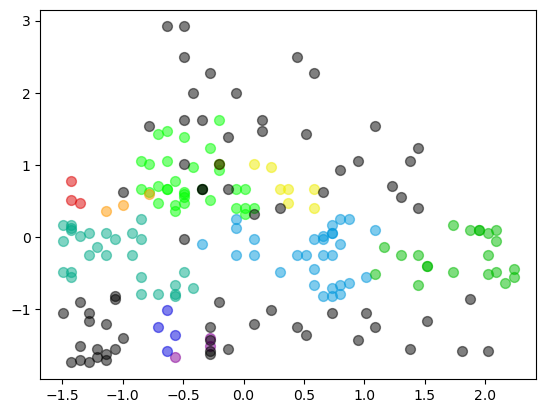

In [165]:
for k , col in zip(unilabelsdb, colorsdb):
    if k == -1 :
        col ='k'
    class_memdb = (labelsdb==k)
    xydb = xdb[class_memdb &coresamp]
    plt.scatter(xydb[:,0],xydb[:,1] , s =50 , c =[col] , marker=u'o', alpha = 0.5)
    xydb1 = xdb[class_memdb &~coresamp]
    plt.scatter(xydb1[:,0],xydb1[:,1] , s =50 , c =[col] , marker=u'o', alpha = 0.5)
plt.show()

In [128]:
dfh =pd.read_csv('customer.csv')
print(dfh)
dfh.columns

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [136]:
xh = df[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]
xh =xh.values

In [137]:
xh = MinMaxScaler().fit_transform(xh)

In [142]:
disth =eud(xh,xh)

In [145]:
z = hierarchy.linkage(disth,'complete')

/tmp/ipykernel_244248/2451677886.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(disth,'complete')


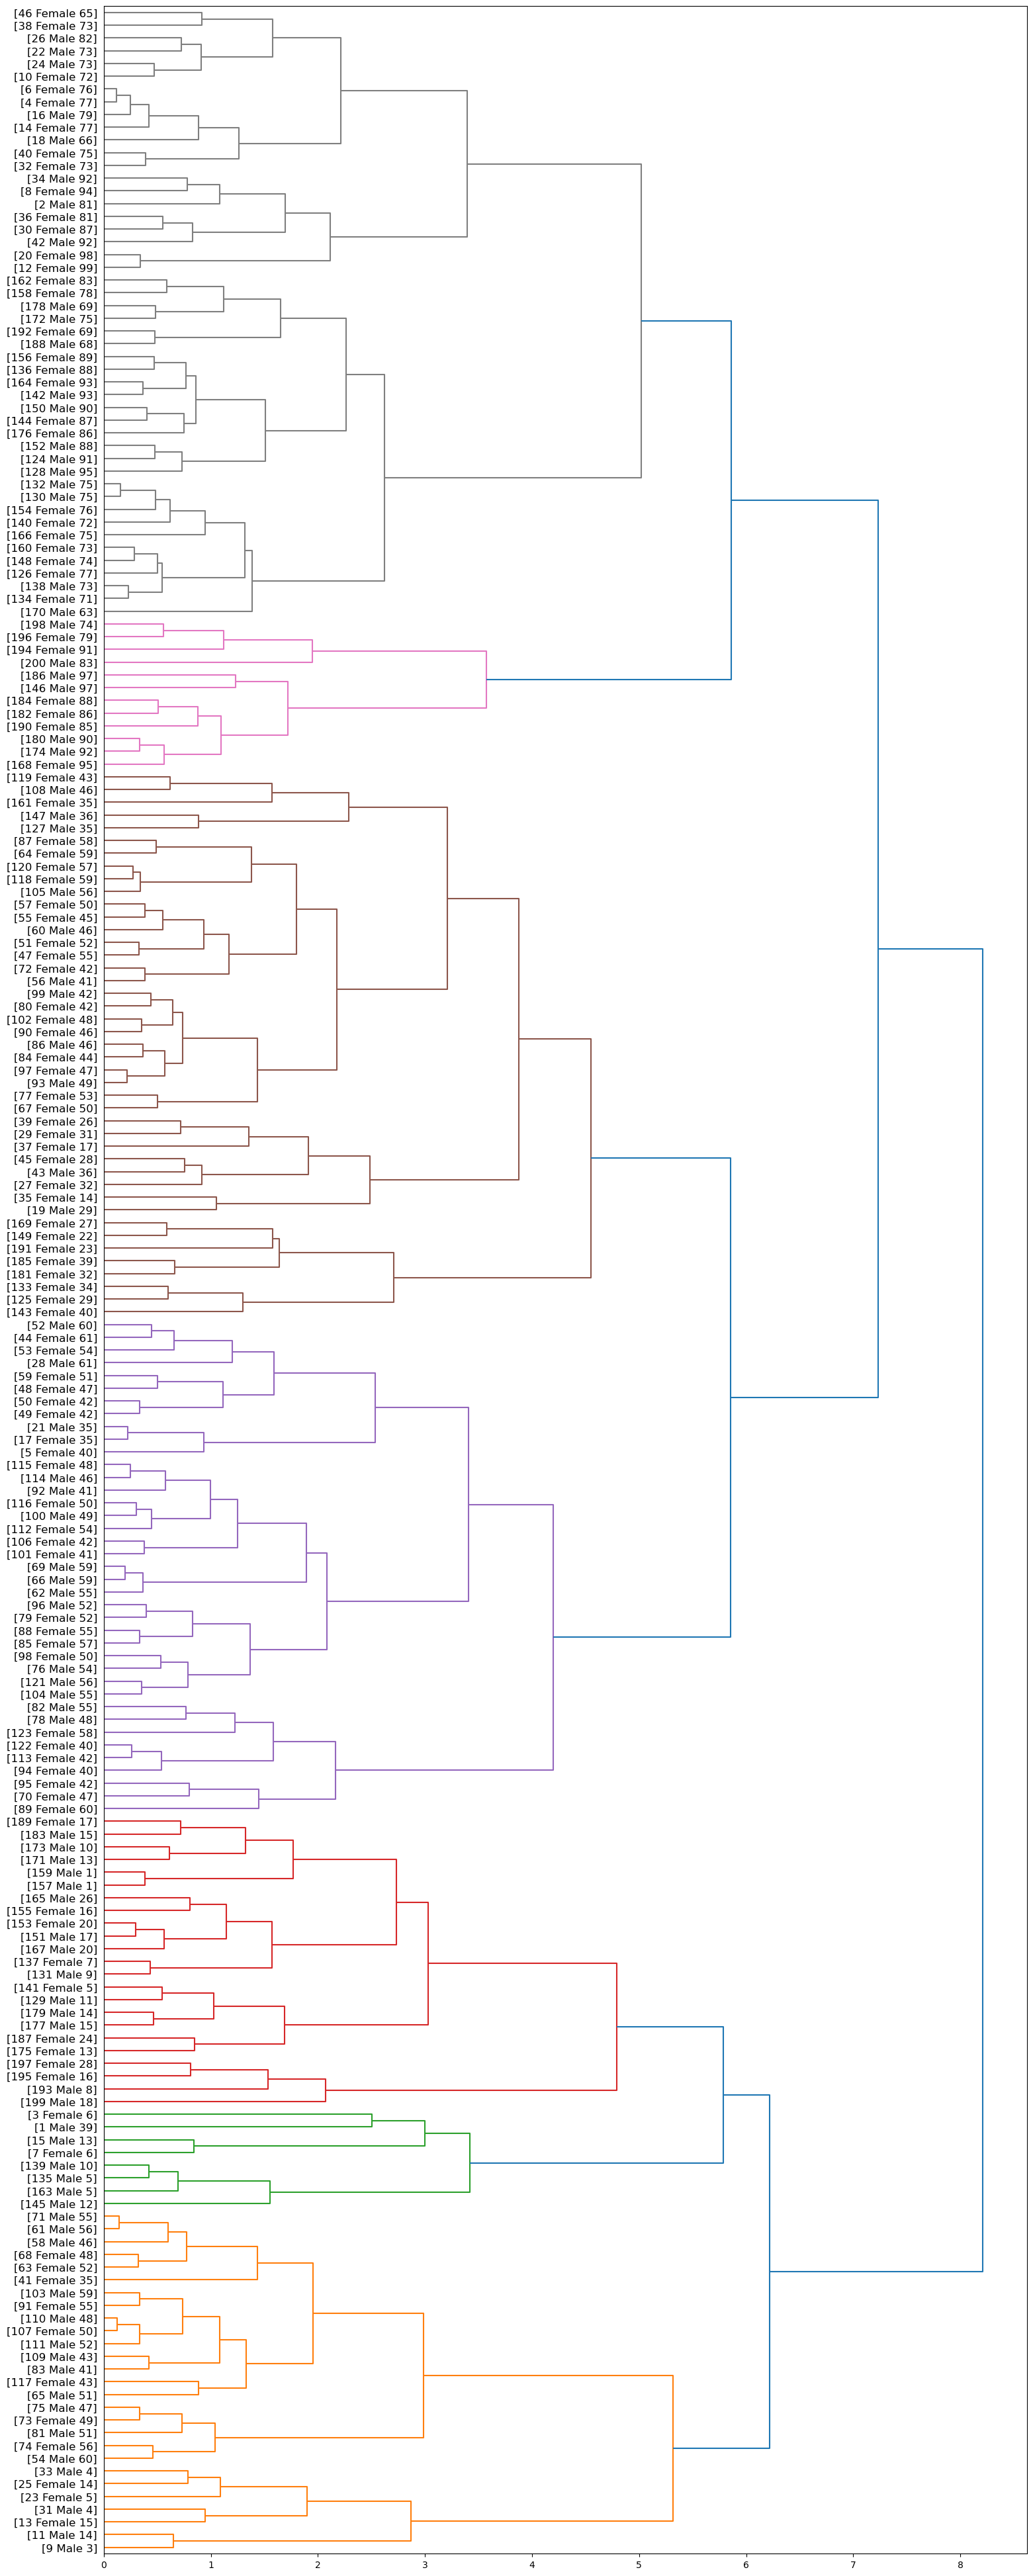

In [149]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (dfh['CustomerID'][id], dfh['Gender'][id], int(float(dfh['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')
plt.show()

In [188]:
dfk = pd.read_csv('customer.csv')
dfk

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [189]:
xk = dfk.values[:,2:]
xk = np.nan_to_num(xk)
xk

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16, 6],
       [23, 16, 77],
       [31, 17, 40],
       [22, 17, 76],
       [35, 18, 6],
       [23, 18, 94],
       [64, 19, 3],
       [30, 19, 72],
       [67, 19, 14],
       [35, 19, 99],
       [58, 20, 15],
       [24, 20, 77],
       [37, 20, 13],
       [22, 20, 79],
       [35, 21, 35],
       [20, 21, 66],
       [52, 23, 29],
       [35, 23, 98],
       [35, 24, 35],
       [25, 24, 73],
       [46, 25, 5],
       [31, 25, 73],
       [54, 28, 14],
       [29, 28, 82],
       [45, 28, 32],
       [35, 28, 61],
       [40, 29, 31],
       [23, 29, 87],
       [60, 30, 4],
       [21, 30, 73],
       [53, 33, 4],
       [18, 33, 92],
       [49, 33, 14],
       [21, 33, 81],
       [42, 34, 17],
       [30, 34, 73],
       [36, 37, 26],
       [20, 37, 75],
       [65, 38, 35],
       [24, 38, 92],
       [48, 39, 36],
       [31, 39, 61],
       [49, 39, 28],
       [24, 39, 65],
       [50, 40, 55],
       [27, 40, 47]

In [190]:
xks = StandardScaler().fit_transform(xk)

In [198]:
km = KMeans(init ='k-means++',n_clusters = 5, n_init=20)
km.fit(xks)
labels = km.labels_

In [199]:
numeric_columns = df.select_dtypes(include=['number']).columns
df['cluster_num'] = labels  
cluster_means = df.groupby('cluster_num')[numeric_columns].mean()
cluster_means

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster num,cluster_num
cluster_num,,,,,,
0,55.648148,25.185185,41.092593,62.240741,3.0,0.0
1,159.743590,39.871795,86.102564,19.358974,2.0,1.0
2,161.025000,32.875000,86.100000,81.525000,1.0,2.0
3,83.872340,55.638298,54.382979,48.851064,0.0,3.0
4,24.100000,46.250000,26.750000,18.350000,4.0,4.0


In [200]:
kmcs = km.cluster_centers_
kmcs

array([[-0.98067852, -0.74305983,  0.46744035],
       [ 0.07333084,  0.97494509, -1.19729675],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 1.20484056, -0.23577338, -0.05236781],
       [ 0.5310735 , -1.2905084 , -1.23646671]])

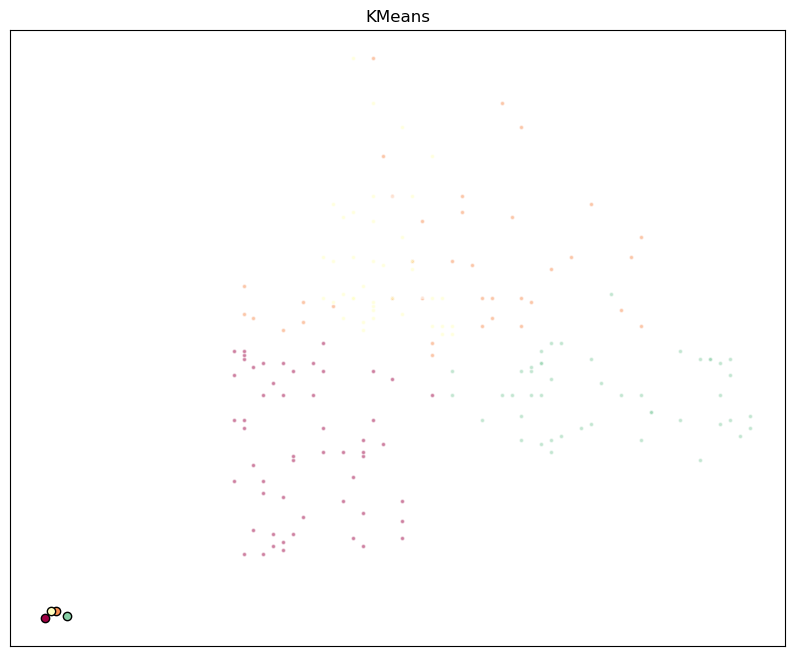

In [201]:
fig = plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    my_members = (labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = kmcs[k]
    
    # Plots the datapoints with color col.
    ax.plot(xk[my_members, 0], xk[my_members, 1], 'w', markerfacecolor=col, marker='.',alpha=0.5)
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
